#Question 1

### Question 1a

In [1]:
import numpy as np
from copy import deepcopy

In [2]:
! wget https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt

--2023-02-28 05:35:57--  https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K   753KB/s    in 0.3s    

2023-02-28 05:35:58 (753 KB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



In [3]:
# initalize the centers
inital_centers = np.array([[10,10],[-10,-10],[2,2],[3,3],[-3,-3]]).astype('float64')

In [4]:
# load the dataset
data = []
with open('/content/f150_motor_distributors.txt','r') as f:
  for line in f.readlines():
    data.append(line.strip().split(','))
data = np.array(data).astype('float64')

In [5]:
def K_means(data,distance,inital_state,max_iteration=100):
  centers = deepcopy(inital_state)
  for iteration in range(max_iteration):
      new_centers = np.zeros_like(centers)
      centers_count = np.zeros(centers.shape[0])
      for i in range(data.shape[0]):
        # assign a center for each sample
        min_dist = np.inf
        c = None
        for j in range(centers.shape[0]):
          dist = distance(data[i],centers[j])
          if dist < min_dist:
            c = j
            min_dist = dist
        new_centers[c]+=data[i]
        centers_count[c]+=1
      # update centers
      for k in range(new_centers.shape[0]):
        new_centers[k] = new_centers[k]/centers_count[k]
      if (new_centers == centers).all():
        break
      centers = new_centers
  return centers

### Question 1b

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
centers = K_means(data, lambda x,y: np.linalg.norm(x - y),inital_centers) 

In [ ]:
labels = np.zeros(data.shape[0])

In [ ]:
for i in range(data.shape[0]):
      # cluster samples
      min_dist = np.inf
      c = None
      for j in range(centers.shape[0]):
        dist = np.linalg.norm(data[i] - centers[j])
        if dist < min_dist:
          c = j
          min_dist = dist
      labels[i] = c

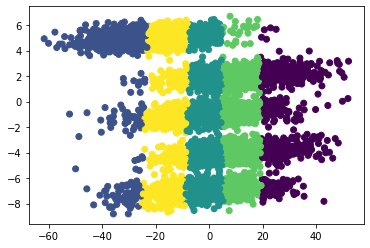

In [ ]:
plt.scatter(x = data[:,0],y = data[:,1], c = labels)
plt.show()

#Question 2

## Question 2a

In [ ]:
P = np.array([[10,0.5],[-10,0.25]]).astype('float64')
R = np.linalg.inv((P.T.dot(P)))
def Mahalanobis_Distance(x,y):
  return (x-y).T.dot(R).dot(x-y)


In [ ]:
centers = K_means(data, Mahalanobis_Distance,inital_centers) 

In [ ]:
labels = np.zeros(data.shape[0])
for i in range(data.shape[0]):
      # cluster samples
      min_dist = np.inf
      c = None
      for j in range(centers.shape[0]):
        dist = Mahalanobis_Distance(data[i],centers[j])
        if dist < min_dist:
          c = j
          min_dist = dist
      labels[i] = c

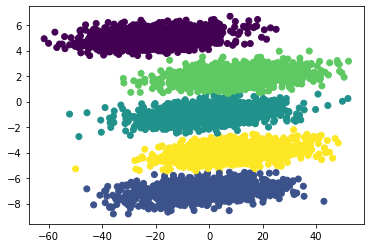

In [ ]:
plt.scatter(x = data[:,0],y = data[:,1], c = labels)
plt.show()

In [ ]:
centers

array([[-20.40310599,   5.00655283],
       [ -3.24764066,  -7.01766444],
       [ -1.09670369,  -0.9992032 ],
       [  9.97451285,   2.00207148],
       [  8.71408722,  -4.00981947]])

## Question 2b

In [6]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
pca.fit(data)

PCA(n_components=2)

In [12]:
pc1 = pca.components_
print(pc1)

[[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]


## Question 2c

In [ ]:
for c in range(5):
  cluster = data[labels==[c]]
  pca = PCA(n_components=2)
  pca.fit(cluster)
  print('cluster {}\'s principle components:'.format(c))
  print(pca.components_)
  print('-'*40)

cluster 0's principle components:
[[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]
----------------------------------------
cluster 1's principle components:
[[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]
----------------------------------------
cluster 2's principle components:
[[ 0.99990986  0.01342629]
 [ 0.01342629 -0.99990986]]
----------------------------------------
cluster 3's principle components:
[[ 0.99993306  0.01157047]
 [-0.01157047  0.99993306]]
----------------------------------------
cluster 4's principle components:
[[-0.99989374 -0.01457781]
 [-0.01457781  0.99989374]]
----------------------------------------


## Question 2d

In [ ]:
v,w = np.linalg.eig(P.T)

In [ ]:
v = np.array([[v[0],0],[0,v[1]]])

In [ ]:
P_ = v*w

In [ ]:
P_

array([[9.44301625, 0.58344264],
       [0.51282107, 0.53717161]])

*P*' = ΛΦ = P.TΦ